<a href="https://colab.research.google.com/github/techshoor/assignment1/blob/main/ML_IRIS_and_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST DATASET WORK

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Load The Dataset

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  #Also Splitig it

## Data Analysis

In [ ]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


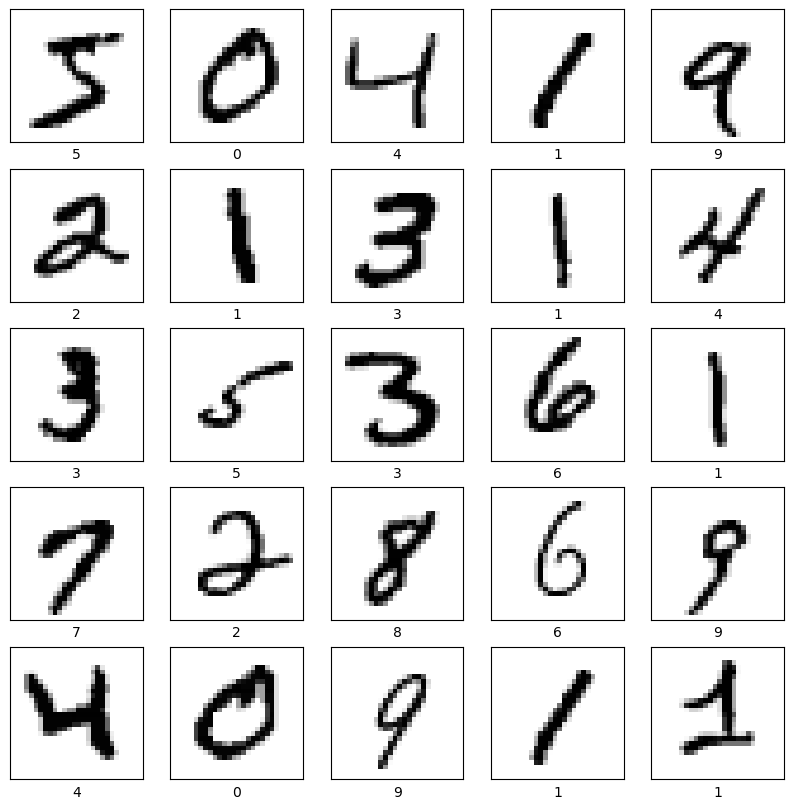

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Data Preprocessing

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Building the Model

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## Train the Model

In [ ]:
from tensorflow.keras.utils import to_categorical
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
log =network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2617 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 7s 16ms/step - loss: 0.1039 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0688 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0491 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0373 - accuracy: 0.9884


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9793


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9793000221252441


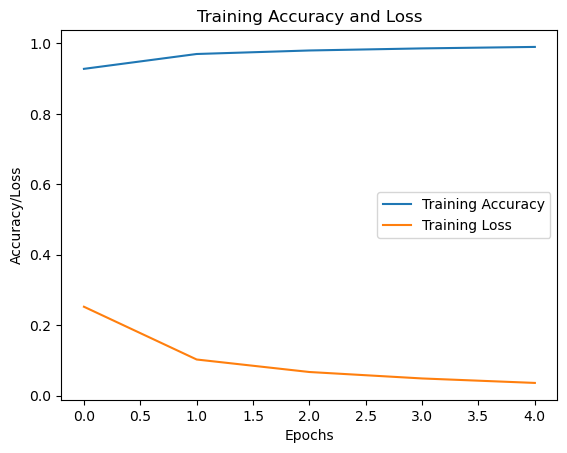

In [ ]:
plt.plot(log.history['accuracy'], label='Training Accuracy')
plt.plot(log.history['loss'], label='Training Loss')

plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

# IRIS DATASET WORK

## Loading the Dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset into a pandas dataframe
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]

# Split the data 
X = df.drop('target', axis=1)
y = df['target']




## Data Analysis

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

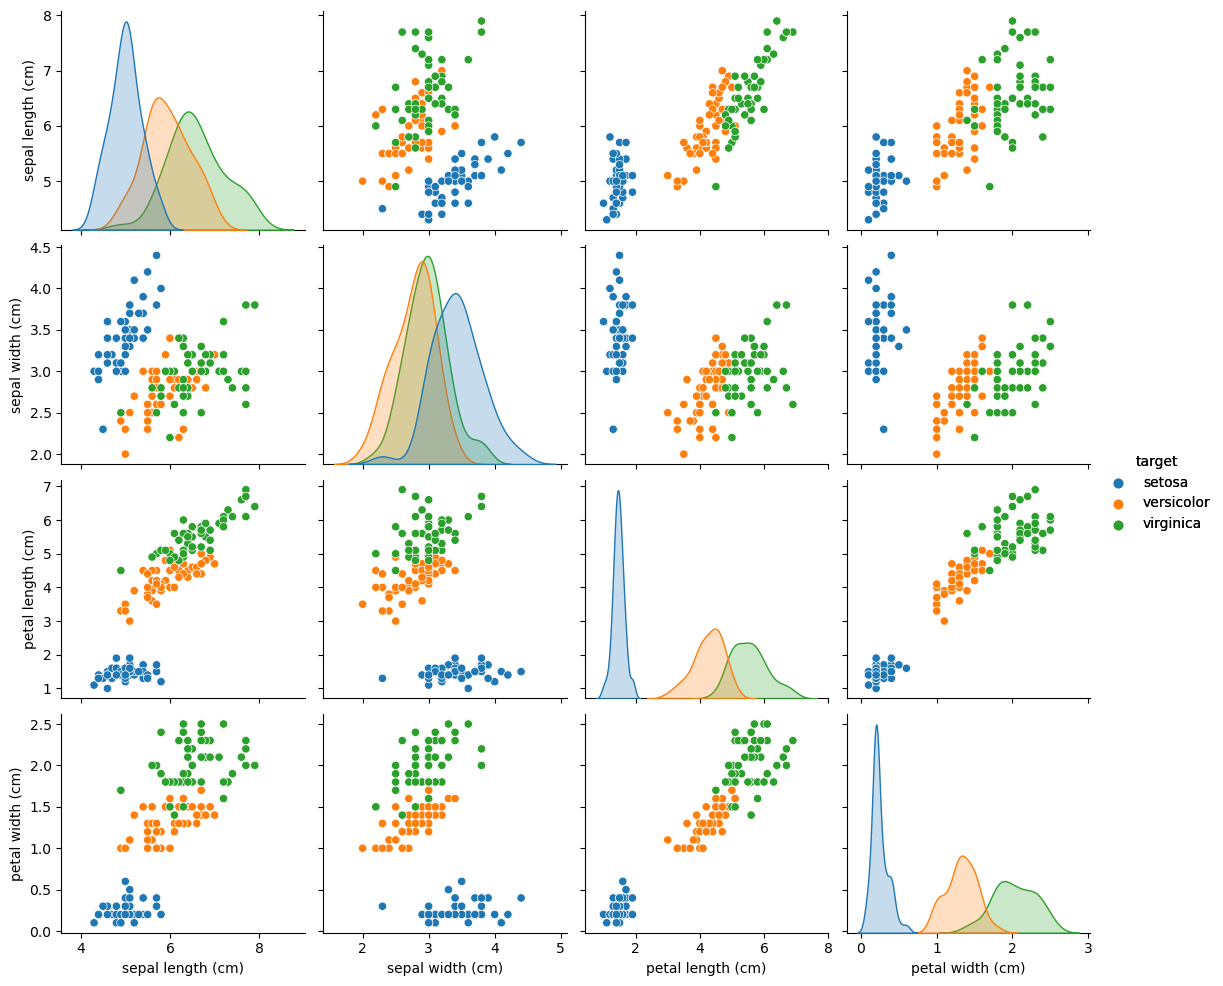

In [ ]:
import seaborn as sns

g = sns.pairplot(df, hue='target')
g.add_legend()
plt.show()

## Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Model Creation & Training

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

Standard_obj = StandardScaler()
Standard_obj.fit(x_train)
x_train_std = Standard_obj.transform(x_train)
x_test_std = Standard_obj.transform(x_test)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_std, y_train)

SVC(gamma=0.1, random_state=0)

## Result

In [ ]:
print('Training data accuracy {:.2f}'.format(svm.score(x_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(svm.score(x_test_std, y_test)*100))

Training data accuracy 99.17
Testing data accuracy 90.00


## Using Decisiontree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9666666666666667


In [ ]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(15,10))
# plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
# plt.show()

In [ ]:
#Done